<a href="https://colab.research.google.com/github/gabrielutomo/Youtube-Music-Hits/blob/main/Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

#MEMBACA DATASET

In [3]:
# Load dataset
data = pd.read_csv("/content/youtube-top-100-songs-2025.csv")

# Lihat 5 data pertama
display(data.head())

# Cek struktur data
data.info()


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


In [4]:
# Import pandas
import pandas as pd

# Load dataset
data = pd.read_csv("/content/youtube-top-100-songs-2025.csv")

# Lihat 5 data pertama
display(data.head())

# Cek struktur data melihat struktur dataset, seperti title, categories, dan apakah ada data kosong.”
data.info()
# Dari 100 data, hanya 85 video punya tags,15 video tidak memiliki tag

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


#CEK APAKAH ADA DATA YANG NULL DAN DUPLIKAT

In [5]:
# Cek data kosong (null)
print("=== CEK DATA NULL ===")
print(data.isnull().sum())

# Cek duplikat
print("\nJumlah duplikat:", data.duplicated().sum())

# Hapus duplikat jika ada
data = data.drop_duplicates()
# mengecek apakah dataset memiliki data kosong pada setiap kolom.

=== CEK DATA NULL ===
title                      0
fulltitle                  0
description                0
view_count                 0
categories                 0
tags                      15
duration                   0
duration_string            0
live_status                0
thumbnail                  0
channel                    0
channel_url                0
channel_follower_count     0
dtype: int64

Jumlah duplikat: 0


#MEMISAHKAN FITUR DAN LABEL

In [6]:
from sklearn.preprocessing import LabelEncoder
# X = variabel input (fitur) yang digunakan untuk memprediksi sesuatu
# y = label atau target yang ingin diprediksi
# Tentukan fitur dan label
from sklearn.preprocessing import LabelEncoder

# Copy data agar aman
df = data.copy()

# Buat encoder
le_categories = LabelEncoder()
le_tags = LabelEncoder()
le_channel = LabelEncoder()

# Encode fitur kategorikal
df['categories_encoded'] = le_categories.fit_transform(df['categories'])
df['tags_encoded'] = le_tags.fit_transform(df['tags'].astype(str))  # pastikan string
df['channel_encoded'] = le_channel.fit_transform(df['channel'])

# Tentukan fitur dan label
X = df[['categories_encoded', 'duration', 'tags_encoded', 'channel_encoded']]
y = df['view_count']  # asli, tidak di-encode

print("Contoh fitur:")
print(X.head())

print("\nContoh label (view_count asli):")
print(y.head())
# Ini adalah data input (X) yang akan digunakan model untuk belajar memprediksi view_count.

Contoh fitur:
   categories_encoded  duration  tags_encoded  channel_encoded
0                   0       173            47               40
1                   0       252            21               29
2                   0       160            31               42
3                   0       231             4                4
4                   0       180            31               42

Contoh label (view_count asli):
0    2009014557
1    1324833300
2       2536628
3     558329099
4       2113548
Name: view_count, dtype: int64


#BALANCING DATA MENGGUNAKAN SMOTE

In [13]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Bin the continuous 'y' (view_count) into categories to use with SMOTE
# Since view_count is highly skewed, using qcut (quantile-based) is often better for creating balanced bins.
# Let's create 5 bins for example. The number of bins can be adjusted.
num_bins = 5 # You can adjust the number of bins as needed
y_binned = pd.qcut(y, q=num_bins, labels=False, duplicates='drop')

# Encode the binned 'y' to get y_encoded
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y_binned)

# Cek distribusi sebelum SMOTE
print("=== Distribusi Sebelum Balancing ===")
print(pd.Series(y_encoded).value_counts())

# Handle missing values in 'tags' (This line caused the KeyError and is removed)
# X['tags'].fillna('', inplace=True) # This was a commented line in the original code, but if uncommented, would cause error as X here is already encoded and doesn't have 'tags' directly.

# Encode categorical features
categorical_features = ['categories', 'tags', 'channel']
one_hot = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                                  remainder='passthrough')

# For X_encoded, we need to use the original df for OneHotEncoder, not X (which is already label encoded)
# The X passed to transformer.fit_transform should contain the raw categorical features for OneHotEncoder.
# Let's reconstruct X for this step, based on df, before applying OneHotEncoder.

# Recreate X with original categorical columns for OneHotEncoder
X_for_onehot = df[['categories', 'duration', 'tags', 'channel']].copy()
# Fill NA in tags for X_for_onehot before OneHotEncoding if desired
X_for_onehot['tags'] = X_for_onehot['tags'].fillna('') # Corrected line to avoid FutureWarning

X_encoded = transformer.fit_transform(X_for_onehot)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# Cek distribusi setelah SMOTE (Membuat kelas menjadi seimbang dengan menambah data sintetis)
print("\n=== Distribusi Setelah SMOTE ===")
print(pd.Series(y_resampled).value_counts())

# SMOTE tidak mengubah apa pun.
# Distribusi label tetap sama persis, jumlahnya tetap 100 kelas dengan frekuensi 1.


=== Distribusi Sebelum Balancing ===
4    20
0    20
2    20
3    20
1    20
Name: count, dtype: int64

=== Distribusi Setelah SMOTE ===
4    20
0    20
2    20
3    20
1    20
Name: count, dtype: int64


#NORMALISASI DAN SPLIT DATA

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur agar skala serupa
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_resampled)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

# membagi data menjadi data latih (train) dan data uji (test)

Data training: (80, 145)
Data testing: (20, 145)


#TRAINING MODEL NAIVE BAYES

In [11]:
from sklearn.naive_bayes import GaussianNB

# Buat model Naive Bayes Gaussian Digunakan untuk memprediksi berdasarkan distribusi Gaussian (normal).
model = GaussianNB()

# Latih model
# Convert sparse matrix to dense array
model.fit(X_train.toarray(), y_train)

print("Model berhasil dilatih ✅")

Model berhasil dilatih ✅


#EVALUASI MODEL

=== HASIL EVALUASI ===
Akurasi: 35.00%
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      0.40      0.50         5
           2       0.29      0.40      0.33         5
           3       0.00      0.00      0.00         2
           4       0.29      0.40      0.33         5

    accuracy                           0.35        20
   macro avg       0.45      0.31      0.33        20
weighted avg       0.46      0.35      0.37        20



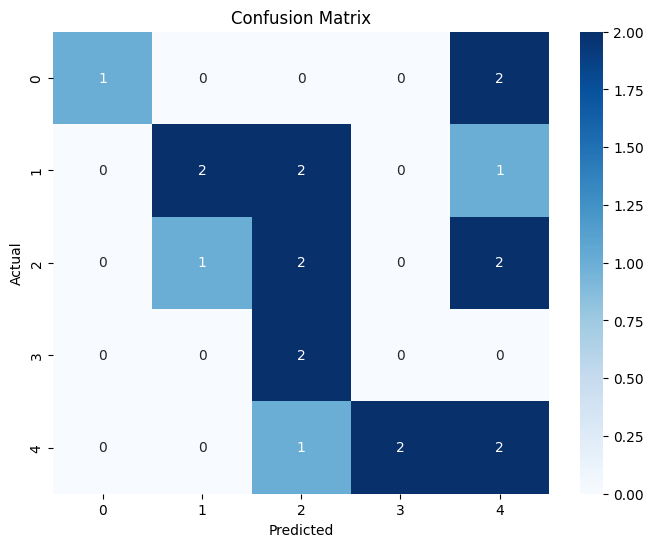

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for unique

# Prediksi data uji Model Naive Bayes yang sudah dilatih digunakan untuk memprediksi label dari data test.
y_pred = model.predict(X_test.toarray())

# Menggabungkan semua label asli (y_test) dan label prediksi (y_pred).
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Di bagian ini, label angka (hasil encoding) dikembalikan ke nilai view_count asli, supaya confusion matrix labelnya terbaca (angka view_count asli)
target_names_subset = le_y.inverse_transform(unique_labels).astype(str).tolist()


# Evaluasi hasil Menghitung persentase prediksi yang benar.
print("=== HASIL EVALUASI ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Classification Report:", classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names_subset, zero_division=0))

# Confusion Matrix visual
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(8, 6)) # Increase figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_subset, yticklabels=target_names_subset)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#PREDIKSI MANUAL (INPUT DARI USER)

In [21]:
import pandas as pd

# Input manual - ask for the correct features and handle types
categories_input = input("Masukkan kategori (contoh: Music): ")
duration_input = float(input("Masukkan durasi dalam detik (contoh: 173): "))
tags_input = input("Masukkan tags (pisahkan dengan semicolon, contoh: Pop;Rock): ")
channel_input = input("Masukkan nama channel (contoh: ROSÉ): ")


# Create a DataFrame with the same column names as the training data
input_df = pd.DataFrame([[categories_input, duration_input, tags_input, channel_input]],
                        columns=['categories', 'duration', 'tags', 'channel'])

# Apply the same preprocessing as used for the training data
# We need to use the fitted preprocessor and scaler
input_processed = transformer.transform(input_df)
input_scaled = scaler.transform(input_processed)


# Prediksi
pred = model.predict(input_scaled.toarray()) # Convert to dense array for GaussianNB
pred_label = le_y.inverse_transform(pred)

print(f"\nPrediksi View Count: {pred_label[0]}")

Masukkan kategori (contoh: Music): music
Masukkan durasi dalam detik (contoh: 173): 173
Masukkan tags (pisahkan dengan semicolon, contoh: Pop;Rock): pop
Masukkan nama channel (contoh: ROSÉ): ROSÉ & Bruno Mars 

Prediksi View Count: 4
